# Desafio Data Science

### Wanderson Henrique dos Santos - wan.mecanica@hotmail.com

## Dataset​: Bank Marketing

### Teste de proficiência 

## Descrição

Este conjunto de dados foi extraído do UCI Machine Learning Repository. <br /> Consiste em dados da campanha de marketing de uma Instituição Bancária portuguesa.<br /> As campanhas de marketing foram baseadas em chamadas telefônicas. Muitas vezes, era necessário mais de um contato para o mesmo cliente.

Iniciaremos com a importação das bibliotecas mais utilizadas para Data Science

In [2]:
# Importando os módulos das bibliotecas de Data Science

import sys
import IPython 
from IPython import display

import numpy as np
import pandas as pd      

import scipy as sp

#import matplotlib as plt
from matplotlib import pyplot as plt
from matplotlib import pylab
import seaborn as sns


# uma script com funcionalidades
import Functions as fn

#ML
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Faz com que os relatórios (plots) sejam apresentados em uma célula e não em uma nova janela
%matplotlib inline
#%matplotlib notebook

pylab.rcParams['figure.figsize'] = (3,3)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#sns.set(style="ticks", color_codes=True)

------------------

In [2]:
# Checando as versões para acompanhamento de atualizações

print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
#print("matplotlib version: {}". format(plt.__version__))
print("SciPy version: {}". format(sp.__version__)) 
print("scikit-learn version: {}". format(sk.__version__))
print("Seaborn version: {}". format(sns.__version__)) 
print("IPython version: {}". format(IPython.__version__))

Python version: 3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 09:07:38) 
[GCC 7.3.0]
NumPy version: 1.16.3
pandas version: 0.23.3
SciPy version: 1.2.1
scikit-learn version: 0.20.3
Seaborn version: 0.9.0
IPython version: 6.5.0


Importaremos os datasets disponibilizados para a analise dos clientes. <br /><br />
Temos um dataset resumido ('bank.csv') para uma analise rápida; e <br /> temos o dataset completo ('bank-full.csv') que possuí todas as informações.

In [4]:
# Prepara os dados - importando os datasets
bank_full_df = pd.read_csv('./dados/bank-full.csv',sep=';',header=0)
bank_df = pd.read_csv('./dados/bank.csv',sep=';',header=0)


In [4]:
bank_full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Verifica a importação dos dados 

print(bank_full_df.count())

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64


Verificando números nulos

In [6]:
bank_full_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Verificando a tendência central, a dispersão e a forma de distribuição dos dados

In [7]:
bank_full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


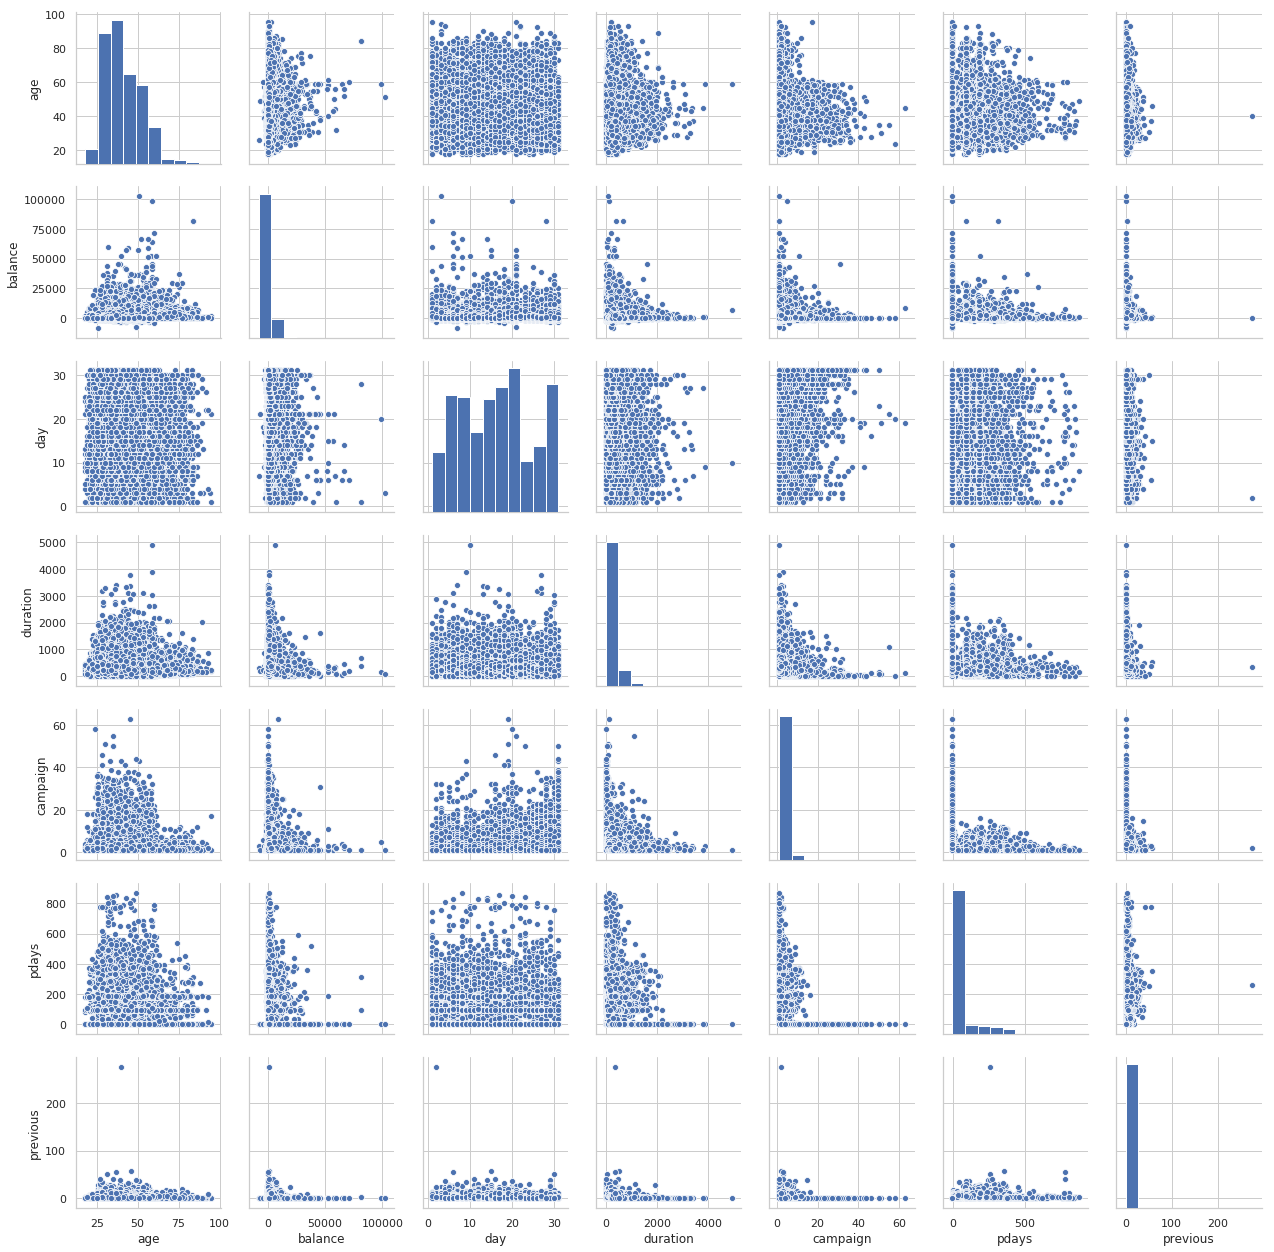

In [8]:
# Checando a variável Preditora
sns.pairplot(data=bank_full_df)

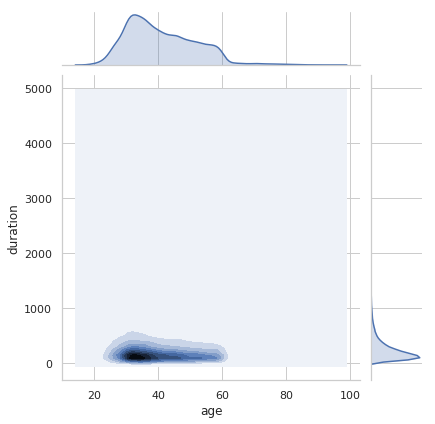

In [9]:
sns.jointplot(x="age",y='duration', data=bank_full_df, kind="kde" )

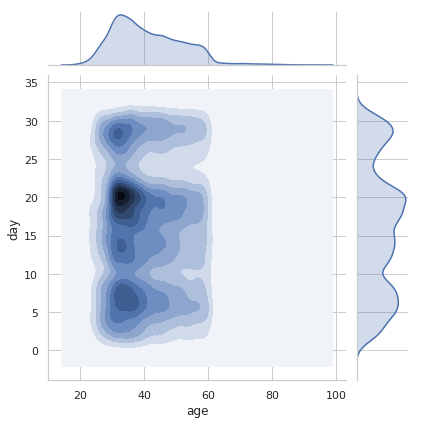

In [10]:
sns.jointplot(x="age",y='day', data=bank_full_df, kind="kde" )

Não rodar o comando abaixo.
Falta implementar e testar


In [12]:
#f, ax = plt.subplots(figsize=(6,6))
#sns.kdeplot(bank_full_df.age, bank_full_df.duration, ax=ax)
#sns.rugplot(bank_full_df.age, color='g', ax=ax)
#sns.rugplot(bank_full_df.age, vertical=True, ax=ax)

###### Resumo dos dados

***
   #### Variáveis de entrada
   
   **[1]** - age: idade dos contatos<br />
   **[2]** - job : Lista com a categoria de emprego<br />
   **[3]** - marital : Estado civil<br />
   **[4]** - education: Nível de escolaridade<br />
   **[5]** - default: Tem crédito?<br />
   **[6]** - balance: Balanço médio anual<br />
   **[7]** - housing: Tem empréstimo habitacional?<br />
   **[8]** - loan: Tem empréstimo pessoal? (binary: "yes","no")<br />

   #### relacionado com o último contato da campanha atual:

  **[9]** - contact: tipo de comunicação entre os contatos<br />
  **[10]** - day: Último dia de contato do mês<br />
  **[11]** - month: Último mês de contato do ano<br />
  **[12]** - duration: Duração do ultimo contato<br />
   
   #### Outro atributos:
   
  **[13]** - campaign: número de contatos realizados durante esta campanha para este cliente<br />
  **[14]** - pdays: número de dias que passaram depos que o cliente foi contatado para a 
  última campanha.<br />  
  **[15]** - previous: número de contatos realizados antes desta campanha e para este cliente<br />  
  **[16]** - poutcome: resultado anterior da campanha de marketing<br /> 
  **[17]** - y: o cliente assinou um depósito a prazo?<br />

***

Descrição das variáveis :

**[1] age:** numeric<br />
**[2] job :** admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student<br />
**[3] marital :** married, single, divorced<br />
**[4] education:** secondary, tertiary, primary, unknown<br />
**[5] default :** yes, no<br />
**[6] housing :** yes, no<br />
**[7] loan :** yes, no<br />
**[8] deposit :** yes, no **(Dependent Variable)**<br />
**[9] contact :** unknown, cellular, telephone<br />
**[10] month :** jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec<br />
**[11] poutcome:** unknown, other, failure, success<br />
**[12] y:** yes, no<br />


Variáveis:

**[1] age**<br />
**[2] balance**<br />
**[3] day**<br />
**[4] duration**<br />
**[5] campaign**      <br />
**[6] pdays**                 <br />
**[7] previous**             <br />


In [13]:
bank_full_df.groupby('y').mean().T

y,no,yes
age,40.838986,41.670070
balance,1303.714969,1804.267915
day,15.892290,15.158253
duration,221.182806,537.294574
campaign,2.846350,2.141047
pdays,36.421372,68.702968
previous,0.502154,1.170354


In [14]:
bank_full_df_clean = bank_full_df[bank_full_df.job != 'unknown']
bank_full_df_clean.groupby('job').mean().T

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
age,39.289886,40.044081,42.190989,46.415323,40.449567,61.626767,40.484484,38.740250,26.542644,39.314598,40.961627
balance,1135.838909,1078.826654,1521.470074,1392.395161,1763.616832,1984.215106,1647.970868,997.088108,1388.060768,1252.632092,1521.745971
day,15.564301,15.442561,15.702085,16.002419,16.114189,15.439488,16.027866,15.635532,14.897655,16.408582,15.498081
duration,246.896732,262.901562,256.309348,245.825000,253.995771,287.361307,268.157061,259.318729,246.656716,252.904962,288.543361
campaign,2.575324,2.816995,2.799597,2.820968,2.864348,2.346731,2.853072,2.718344,2.299574,2.906805,2.432080
pdays,47.859021,44.033498,32.486214,21.505645,38.665468,37.443905,34.747308,41.995185,57.041578,37.195077,34.146585
previous,0.671630,0.505138,0.478144,0.371774,0.668006,0.638693,0.551615,0.501204,0.953092,0.574569,0.466616


In [15]:
bank_full_df.groupby('marital').mean().T

marital,divorced,married,single
age,45.782984,43.408099,33.703440
balance,1178.872287,1425.925590,1301.497654
day,15.796428,15.854487,15.708210
duration,262.517188,253.412765,266.497967
campaign,2.630882,2.842875,2.649805
pdays,41.001728,37.950467,44.652385
previous,0.551373,0.556552,0.642690


In [16]:
bank_full_df_clean = bank_full_df[bank_full_df.education != 'unknown']
bank_full_df_clean.groupby('education').mean().T

education,primary,secondary,tertiary
age,45.865567,39.964270,39.593640
balance,1250.949934,1154.880786,1758.416435
day,15.421398,15.759159,16.086535
duration,255.933002,258.685760,258.518532
campaign,2.834331,2.700802,2.825577
pdays,36.081740,42.353504,39.024134
previous,0.489272,0.567753,0.661980


In [17]:
bank_full_df.groupby('default').mean().T

default,no,yes
age,40.961934,39.534969
balance,1389.806424,-137.624540
day,15.795792,16.385276
duration,258.512749,239.115337
campaign,2.756780,3.148466
pdays,40.604536,18.042945
previous,0.586044,0.268712


In [18]:
bank_df_clean = bank_full_df[bank_full_df.contact != 'unknown']
bank_df_clean.groupby('contact').mean().T

contact,cellular,telephone
age,40.400785,47.837922
balance,1397.926993,1803.704061
day,15.930306,16.557467
duration,263.013966,235.366139
campaign,2.690114,3.400895
pdays,56.885129,46.312801
previous,0.804064,0.827254


In [19]:
bank_full_df.groupby('housing').mean().T

housing,no,yes
age,43.139883,39.175288
balance,1596.501270,1175.103064
day,16.066929,15.598249
duration,256.700911,259.331476
campaign,2.845625,2.698488
pdays,26.288581,51.312495
previous,0.484787,0.656665


In [20]:
bank_full_df_clean = bank_full_df[bank_full_df.poutcome != 'unknown']
bank_full_df_clean.groupby('poutcome').mean().T

poutcome,failure,other,success
age,40.786166,39.752174,42.964924
balance,1465.805550,1487.411413,1939.301125
day,14.166701,14.475000,14.449371
duration,244.185880,255.715217,316.868961
campaign,1.980820,2.461413,1.806089
pdays,241.509284,229.683696,163.259431
previous,2.896552,4.009239,3.075447


In [21]:
bank_full_df.groupby('campaign').mean().T

campaign,1,2,3,4,5,6,7,8,9,10,...,39,41,43,44,46,50,51,55,58,63
age,40.664786,40.933627,40.936425,41.599659,41.438209,41.797057,41.759184,41.620370,40.354740,41.729323,...,34.0,35.0,41.333333,49.0,28.0,35.0,30.0,35.0,24.0,45.0
balance,1415.060648,1365.008397,1350.616374,1249.435548,1234.371882,1313.905500,1382.983673,1303.981481,1671.318043,1227.345865,...,4.0,396.5,-108.000000,371.0,235.0,355.0,358.0,432.0,126.0,9051.0
day,14.745896,15.528589,16.106140,16.956843,16.803288,17.727343,17.691156,18.498148,19.039755,19.973684,...,31.0,18.5,19.666667,31.0,16.0,27.0,19.0,21.0,20.0,19.0
duration,261.053637,275.326030,271.638834,253.194492,230.551020,217.083656,213.349660,194.325926,220.030581,189.150376,...,33.0,38.0,25.333333,18.0,102.0,106.0,88.0,1094.0,10.0,124.0
pdays,49.478682,40.177289,37.409165,27.529245,33.198413,28.243997,30.702041,23.901852,17.651376,6.447368,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
previous,0.616393,0.591843,0.604963,0.456275,0.619048,0.712626,0.662585,0.540741,0.330275,0.199248,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
bank_full_df.groupby('previous').mean().T

previous,0,1,2,3,4,5,6,7,8,9,...,32,35,37,38,40,41,51,55,58,275
age,40.932430,40.523810,40.818139,41.892294,40.546218,41.520697,41.277978,42.341463,41.403101,41.434783,...,44.0,28.0,39.0,44.0,35.0,27.0,31.0,37.0,46.0,40.0
balance,1318.788846,1516.228716,1538.663343,1653.856392,1668.498599,1523.468410,1392.039711,1736.590244,1171.744186,1718.934783,...,429.0,6791.0,372.0,72.5,4645.0,821.0,358.0,432.0,1085.0,543.0
day,16.145424,14.405123,14.237417,14.399299,14.210084,14.087146,14.212996,14.087805,14.395349,13.923913,...,18.0,9.0,12.0,21.5,11.0,16.0,30.0,6.0,15.0,2.0
duration,257.726119,256.628066,255.425926,274.721541,269.754902,254.067538,272.501805,264.541463,275.806202,241.478261,...,35.0,361.0,86.5,34.0,502.0,23.0,68.0,386.0,523.0,349.0
campaign,2.921957,1.839466,1.909307,2.070053,2.229692,2.396514,2.324910,2.507317,2.193798,2.967391,...,3.0,1.0,7.5,8.5,3.0,1.0,3.0,3.0,2.0,2.0
pdays,-1.000000,235.063131,230.446344,214.515762,217.418768,205.664488,201.440433,201.224390,193.395349,219.923913,...,349.0,46.0,103.5,254.5,270.0,778.0,256.0,776.0,353.0,262.0


# Analisando os dados

Analisando um pouco os perfis dos clientes em relação a profissão, estado civil, escolaridade; também a quantidade que deixou contatos, sendo celular ou telefone fixo e também empréstimos feitos ou não.

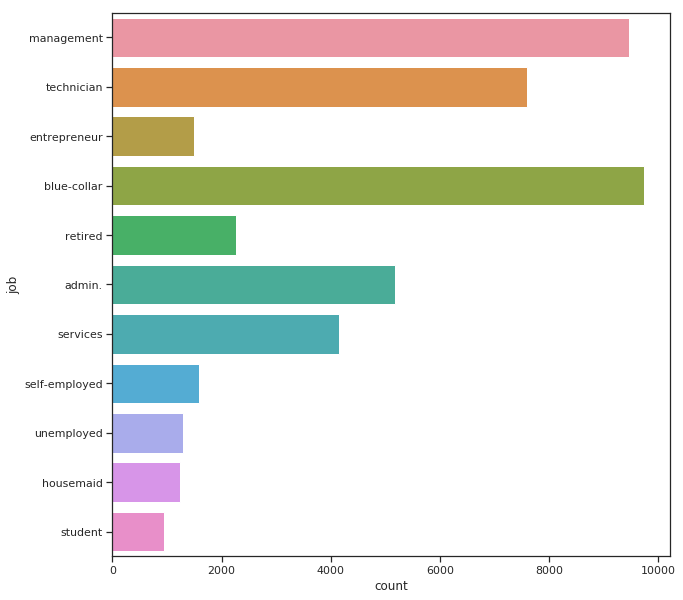

In [23]:
# Contagem do numero de pessoas por profissão

pylab.rcParams['figure.figsize'] = (10,10)
bank_full_df_clear = bank_full_df[bank_full_df.job != 'unknown']
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=bank_full_df_clear)

Text(0, 0.5, 'Frequencia de aparecimento')

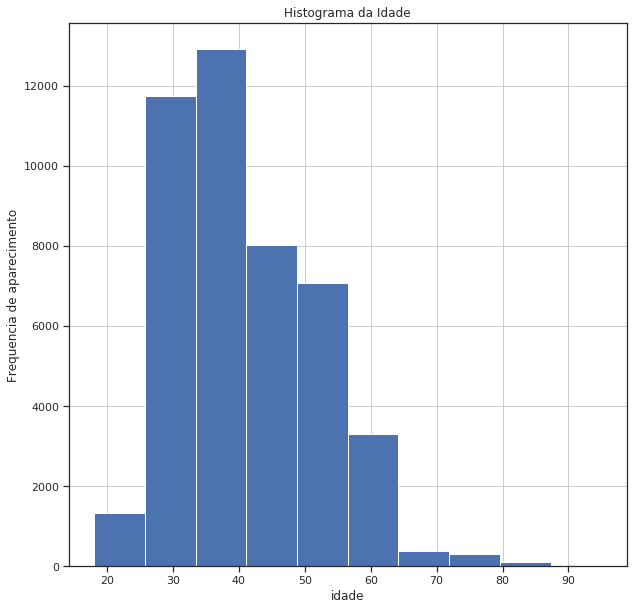

In [24]:
# Frequencia de aparecimento das idades

pylab.rcParams['figure.figsize'] = (10,10)
bank_full_df.age.hist()
plt.title("Histograma da Idade")
plt.xlabel("idade")
plt.ylabel("Frequencia de aparecimento")

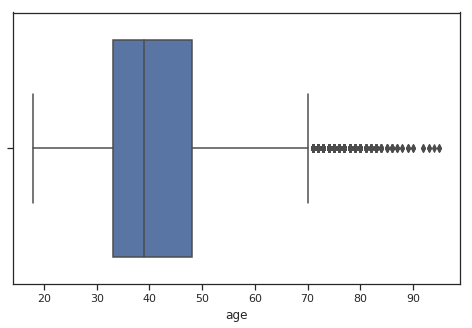

In [25]:
pylab.rcParams['figure.figsize'] = (8,5)
sns.boxplot(x=bank_full_df["age"])

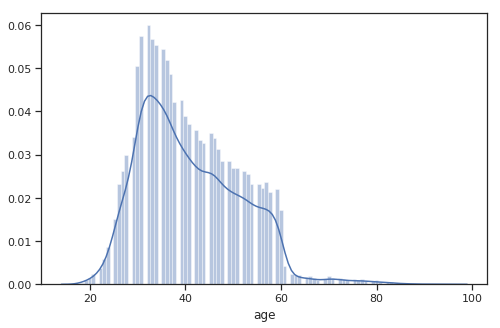

In [26]:
# Distribuição das idade
sns.distplot(bank_full_df.age, bins=100)

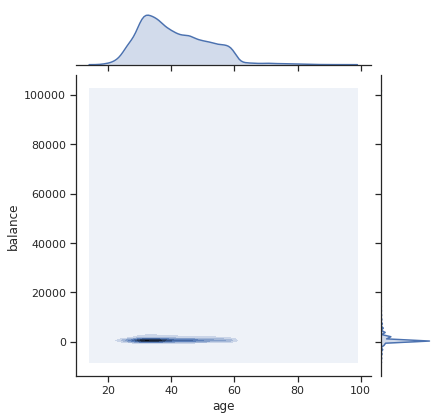

In [27]:
sns.jointplot(x="age",y='balance', data=bank_full_df, kind="kde" )

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

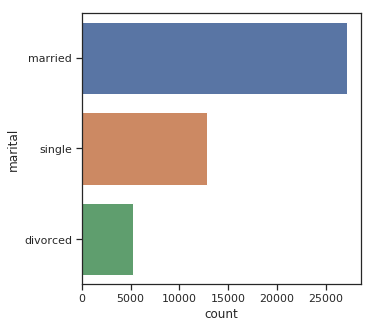

In [28]:
# Contagem do Estado Civil
pylab.rcParams['figure.figsize'] = (5,5)
bank_full_df_clean = bank_full_df[bank_full_df.marital != 'unknown']
sns.countplot(y='marital', data=bank_full_df_clean)

bank_full_df.marital.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

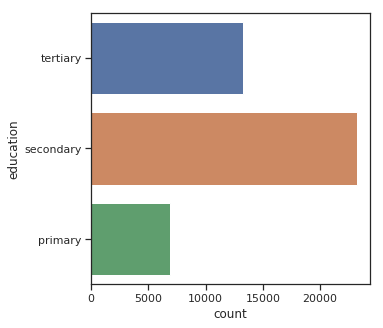

In [29]:
# Grau de escolarida dos clientes

pylab.rcParams['figure.figsize'] = (5,5)
bank_full_df_clean = bank_full_df[bank_full_df.education != 'unknown']

sns.countplot(y='education', data=bank_full_df_clean)

bank_full_df.education.value_counts()

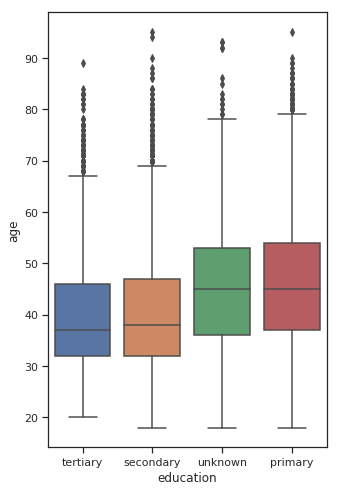

In [30]:
pylab.rcParams['figure.figsize'] = (5,8)
sns.boxplot(x='education', y = 'age', data=bank_full_df)

no     37967
yes     7244
Name: loan, dtype: int64

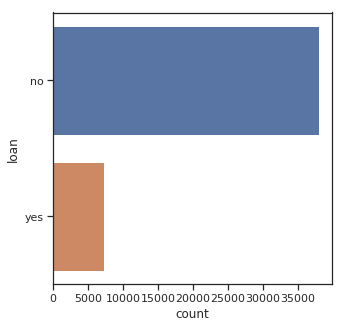

In [31]:
pylab.rcParams['figure.figsize'] = (5,5)
sns.countplot(y='loan', data=bank_full_df)

bank_full_df.loan.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

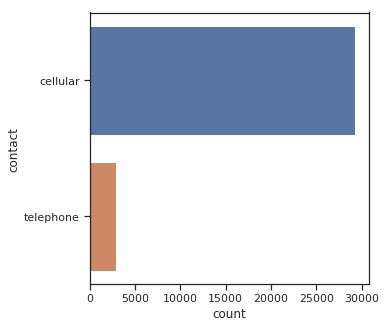

In [32]:
pylab.rcParams['figure.figsize'] = (5,5)
bank_full_df_clean = bank_full_df[bank_full_df.contact != 'unknown']
sns.countplot(y='contact', data=bank_full_df_clean)

bank_full_df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

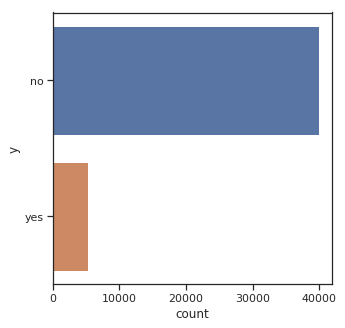

In [33]:
pylab.rcParams['figure.figsize'] = (5,5)
bank_full_df_clean = bank_full_df[bank_full_df.y != 'unknown']
sns.countplot(y='y', data=bank_full_df_clean)

bank_full_df.contact.value_counts()

# Dados importantes

In [34]:
print('verifi 1: ', bank_full_df.groupby(['loan','y']).size())
print('\n\nverificaçao 2: ', bank_full_df.groupby(['job','y']).size())
print('\n\nverificaçao 3: ', bank_full_df.groupby(['marital','y']).size())
print('\n\nverificaçao 4: ', bank_full_df.groupby(['education','y']).size())
print('\n\nverificaçao 5: ', bank_full_df.groupby(['poutcome','y']).size())
print('\n\nverificaçao 6: ', bank_full_df.groupby(['month','y']).size())
print('\n\nverificaçao 6: ', bank_full_df.groupby(['housing','y']).size())
print('\n\nverificaçao 7: ', bank_full_df.groupby(['y','default']).size())

verifi 1:  loan  y  
no    no     33162
      yes     4805
yes   no      6760
      yes      484
dtype: int64


verificaçao 2:  job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
dtype: int64


verificaçao 3:  marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
dtype: int64


verific

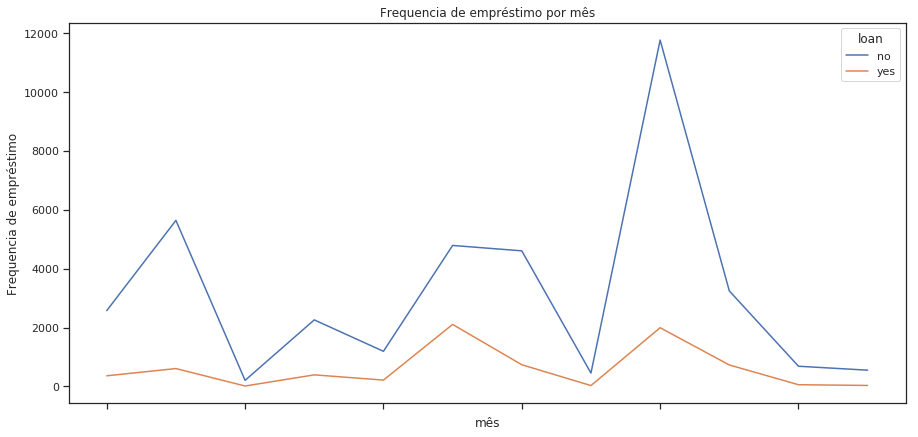

In [35]:
pylab.rcParams['figure.figsize'] = (15,7)
pd.crosstab(bank_full_df.month, bank_full_df.loan).plot(kind='line')

plt.title("Frequencia de empréstimo por mês")
plt.xlabel("mês")
plt.ylabel("Frequencia de empréstimo")
plt.show()
# de alguma forma no meu PC o eixo X não está aparecendo,
# tentei de vários jeitos mas acredito que deixei algo passar e não encontrei o erro.

## 1. Qual profissão tem mais têndencia a fazer um empréstimo? 
***
De acordo com a análise feita, as profissões com mais tendência de realizar um empréstimo seriam primeiramente as 'blue-collar', em seguida 'technician' e depois as 'management'. A com menos tendência em realizar um empréstimo são os 'student'.

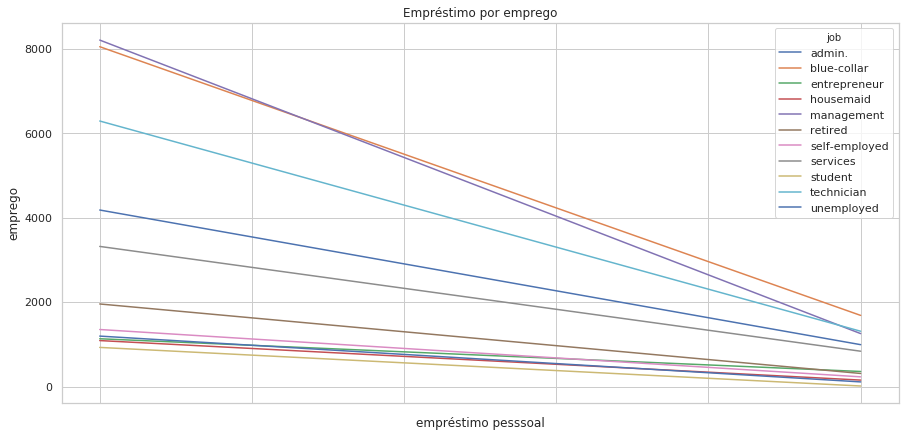

In [16]:
pylab.rcParams['figure.figsize'] = (15,7)
#bank_full_df_clean = bank_full_df[bank_full_df["loan"]  > '8000']

bank_full_df_clean_loan = bank_full_df[bank_full_df.loan != 'unknown']
bank_full_df_clean_job = bank_full_df[bank_full_df.job != 'unknown']

pd.crosstab(bank_full_df_clean_loan.loan, bank_full_df_clean_job.job).plot(kind='line')

plt.title("Empréstimo por emprego")
plt.xlabel("empréstimo pesssoal")
plt.ylabel("emprego")
plt.show()
# de alguma forma no meu PC o eixo X não está aparecendo,
# tentei de vários jeitos mas acredito que deixei algo passar e não encontrei o erro.

In [37]:
bank_data = bank_full_df.copy()

In [38]:
# Número de pessoas que fizeram um empréstimo  de acordo com a profissão
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.loan == "yes") & (bank_data.job == j)])))

management      :  1253
blue-collar     :  1684
technician      :  1309
admin.          :   991
services        :   836
retired         :   309
self-employed   :   229
student         :    12
unemployed      :   109
entrepreneur    :   356
housemaid       :   152
unknown         :     4


In [39]:
# Contagem de tipos de profissões
bank_data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

***
***
***

## 2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
***
Analisando a relação estabelecida entre tipo de comunicação entre os contatos contatos feito e número de contatos realizados durante esta campanha, podemos observar que os contatos feitos via telefone foram os que obtiveram melhores resultados durante a campanha.

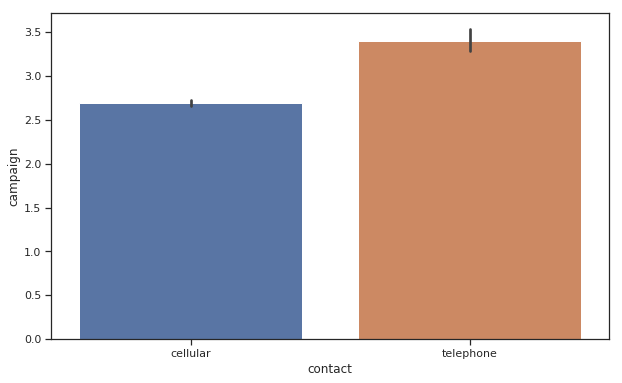

In [40]:
plt.figure(figsize=(10,6))
bank_full_df_clean = bank_full_df[bank_full_df.contact != 'unknown']
sns.barplot(x='contact', y='campaign', data=bank_full_df_clean)

Enquanto isso, podemos observar abaixo que tanto via celular quanto via telefone apresesentaram comportamento semelhantes.

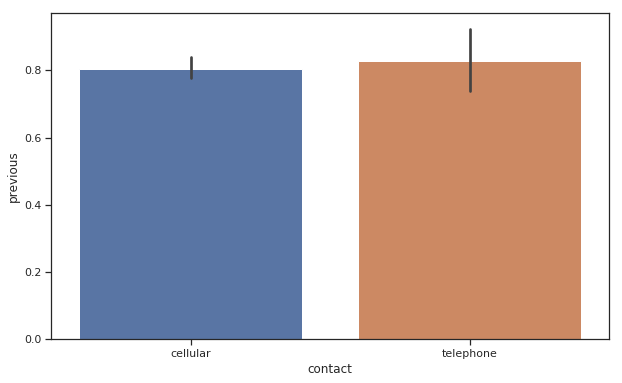

In [41]:
plt.figure(figsize=(10,6))
bank_full_df_clean = bank_full_df[bank_full_df.contact != 'unknown']
sns.barplot(x='contact', y='previous', data=bank_full_df_clean)

***
***
***

## **4. O resultado da campanha anterior tem relevância na campanha atual?**
***
Os resultados abaixo mostram que a realização da campanha antes não foram tõ efetivos quanto durante a campanha. O número de pessoas contactatas foi maior do que antes. 

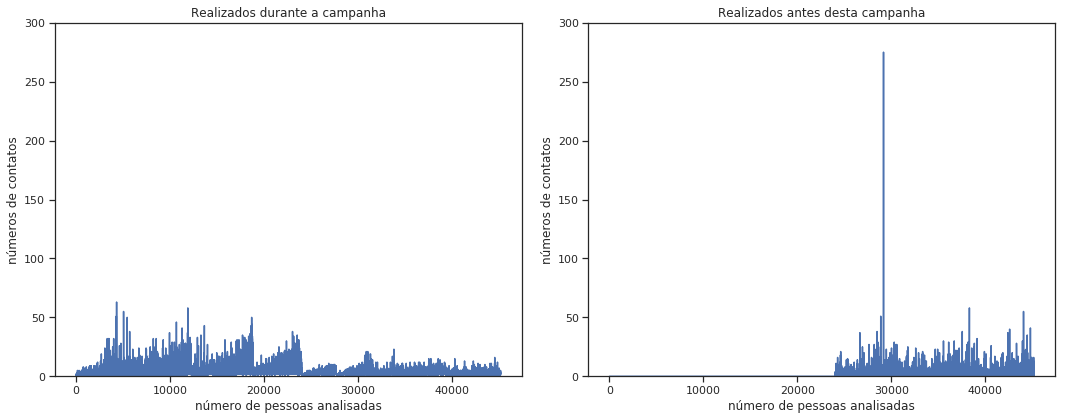

In [42]:
pylab.rcParams['figure.figsize'] = (15,6)
campaign = bank_full_df.iloc[:,12:13]
plt.subplot(1,2,1)
plt.plot(campaign, label='previous')
plt.xlabel("número de pessoas analisadas")
plt.ylabel("números de contatos")
plt.ylim(0,300)
plt.title("Realizados durante a campanha")

previous = bank_full_df.iloc[:,14:15]
plt.subplot(1,2,2)
plt.plot(previous, label='previous')
plt.xlabel("número de pessoas analisadas")
plt.ylabel("números de contatos")
plt.ylim(0,300)
plt.title("Realizados antes desta campanha")

plt.tight_layout()


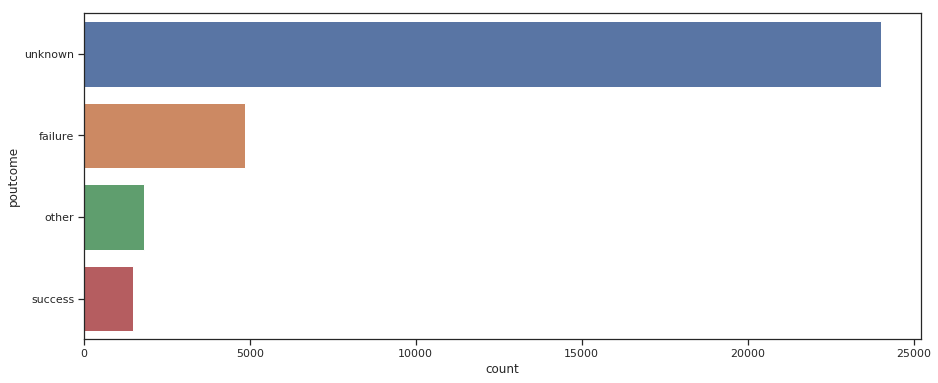

In [43]:
sns.countplot(y='poutcome', data=bank_full_df_clean)

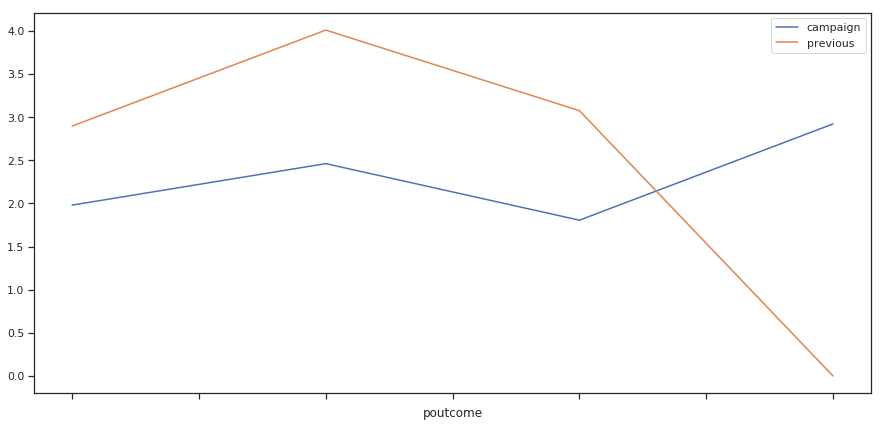

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
bank_full_df.groupby(['poutcome']).mean()[['campaign','previous']].plot(ax=ax)
# de alguma forma no meu PC o eixo X não está aparecendo,
# tentei de vários jeitos mas acredito que deixei algo passar e não encontrei o erro.

In [45]:
#fig, ax = plt.subplots(figsize=(15,7))
#bank_full_df_clean.groupby(['poutcome']).describe()

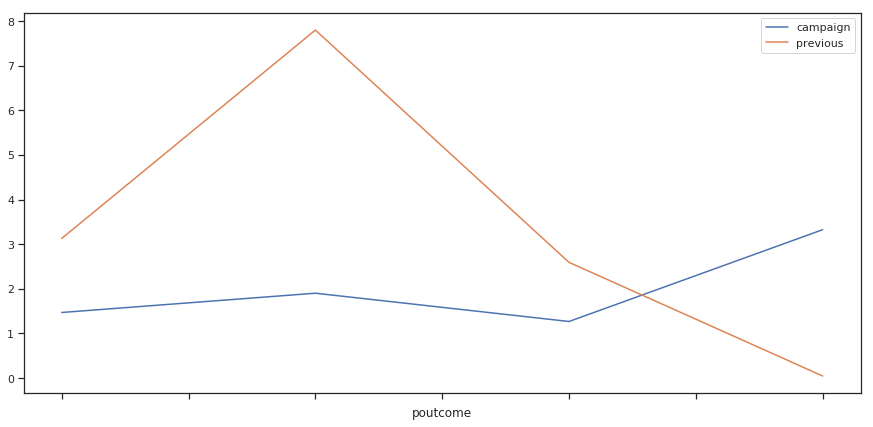

In [46]:
fig, ax = plt.subplots(figsize=(15,7))
bank_full_df.groupby(['poutcome']).std()[['campaign','previous']].plot(ax=ax)
# de alguma forma no meu PC o eixo X não está aparecendo,
# tentei de vários jeitos mas acredito que deixei algo passar e não encontrei o erro.

***
***
***

## **3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?**
***
Baseando-se apenas nas analises abaixo não consegui chegar numa conclusão convincente para melhor efetivação dessa questão.


In [47]:
bank_full_df_clean.groupby(['contact']).describe()[['campaign','previous']]

campaign                                               previous  \
             count      mean       std  min  25%  50%  75%   max    count   
contact                                                                     
cellular   29285.0  2.690114  2.900720  1.0  1.0  2.0  3.0  50.0  29285.0   
telephone   2906.0  3.400895  3.623406  1.0  1.0  2.0  4.0  43.0   2906.0   

                                                          
               mean       std  min  25%  50%  75%    max  
contact                                                   
cellular   0.804064  2.695072  0.0  0.0  0.0  1.0  275.0  
telephone  0.827254  2.501998  0.0  0.0  0.0  0.0   37.0

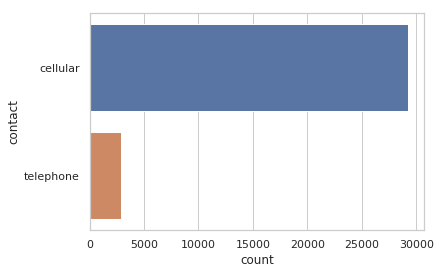

In [9]:
bank_full_df_clean_contact = bank_full_df[bank_full_df.contact != 'unknown']
sns.countplot(y='contact', data=bank_full_df_clean_contact)

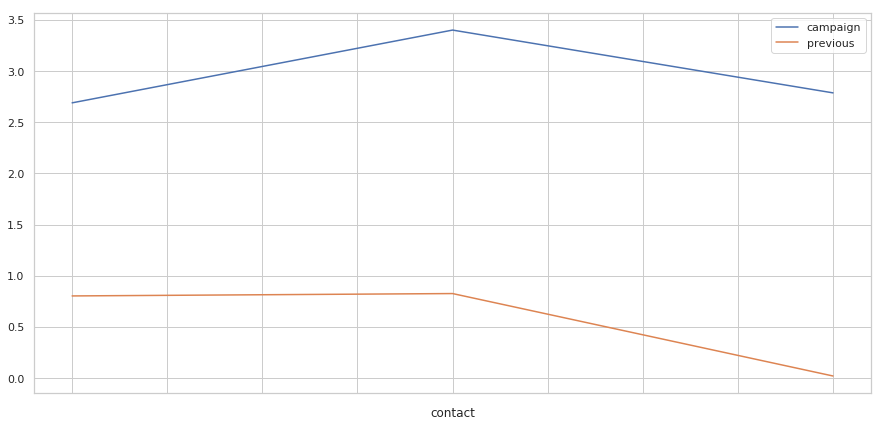

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
bank_full_df.groupby(['contact']).mean()[['campaign','previous']].plot(ax=ax)
# de alguma forma no meu PC o eixo X não está aparecendo,
# tentei de vários jeitos mas acredito que deixei algo passar e não encontrei o erro.

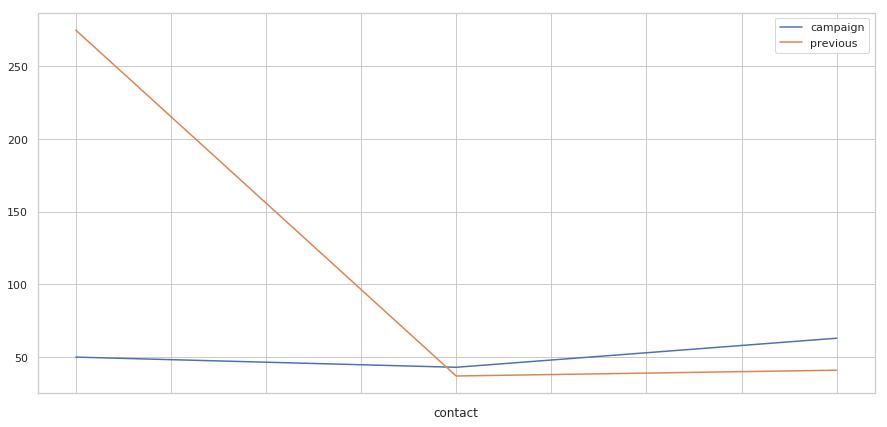

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
bank_full_df.groupby(['contact']).max()[['campaign','previous']].plot(ax=ax)
# de alguma forma no meu PC o eixo X não está aparecendo,
# tentei de vários jeitos mas acredito que deixei algo passar e não encontrei o erro.

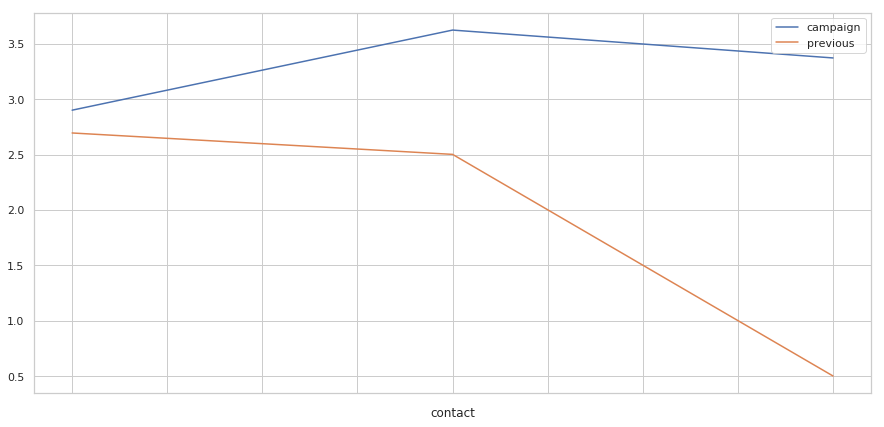

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
bank_full_df.groupby(['contact']).std()[['campaign','previous']].plot(ax=ax)
# de alguma forma no meu PC o eixo X não está aparecendo,
# tentei de vários jeitos mas acredito que deixei algo passar e não encontrei o erro.

***
***
***

## 5. Qual o fator determinante para que o banco exija um seguro de crédito?
***
Para a determinação de um seguro de crédito, muitos fatores podem ser levados em conta, por exemplo, a idade dos clientes, o emprego atual, a profissão, o balanço médio anual, se possuí crédito habitacional e empréstimo pessoal. Todos eles, em conjunto, pode-se trazer muitas métricas dos potenciais clientes para a liberação de seguro de crédito e de sua exigência. 

Analisando os gráficos abaixo, utilizaria o critério 'loan' para ser determinante no critério de exigência.




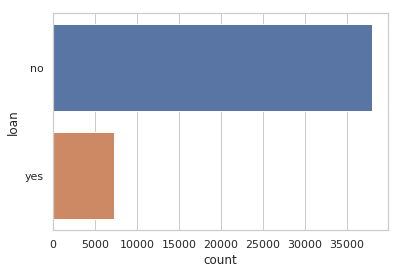

In [6]:
sns.countplot(y='loan', data=bank_full_df_clean)

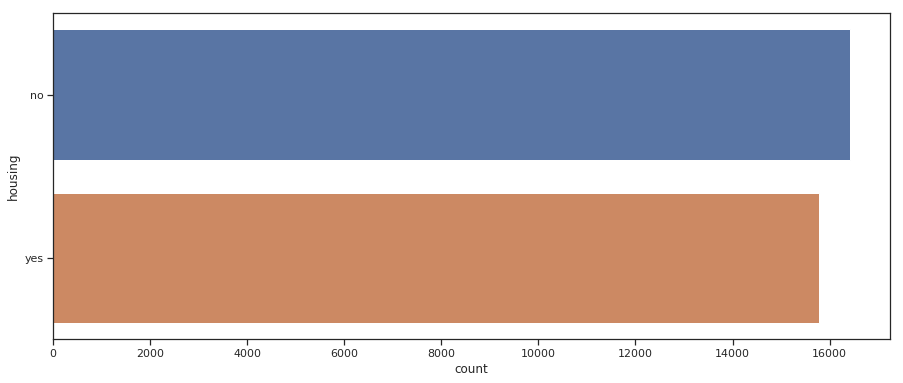

In [52]:
sns.countplot(y='housing', data=bank_full_df_clean)

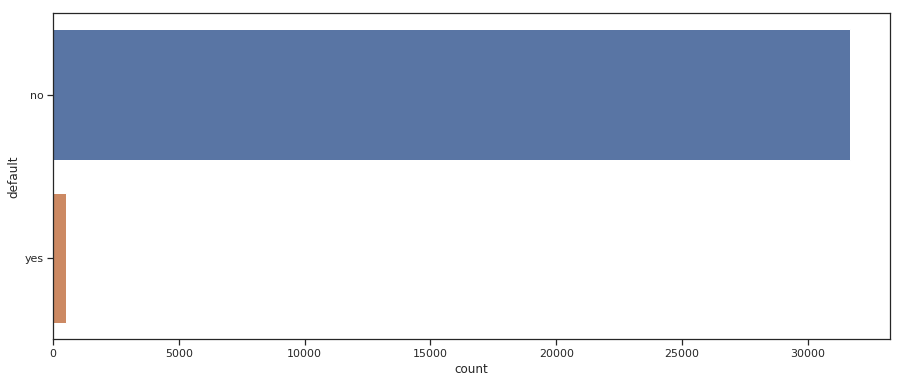

In [81]:
sns.countplot(y='default', data=bank_full_df_clean)

Text(0, 0.5, 'Balanço anual médio por pessoa')

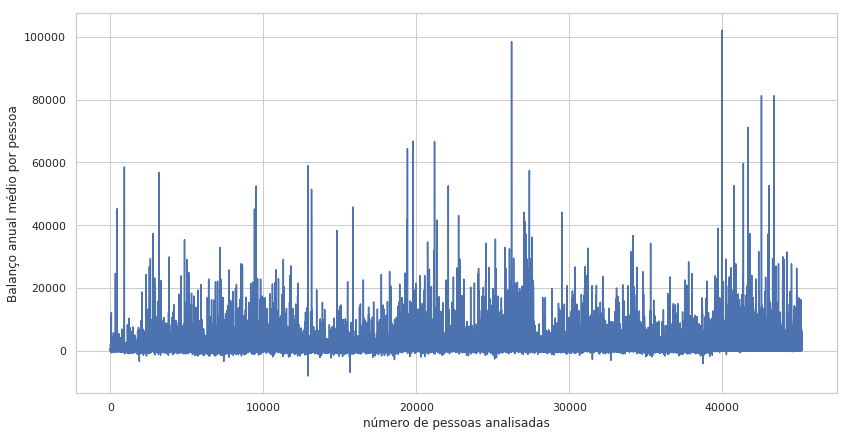

In [22]:
pylab.rcParams['figure.figsize'] = (30,7)
balance = bank_full_df.iloc[:,5:6]
plt.subplot(1,2,1)
plt.plot(balance, label='previous')
plt.xlabel("número de pessoas analisadas")
plt.ylabel("Balanço anual médio por pessoa")


***
***
***

## 6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?
***
Através do gráfico de correlação de Pearson, podemos analisar uma relação linear positiva entre as idades dos clientes, juntamente com a profissão e grau de escolaridade. E também uma relação positiva entre os clientes que assinaram um depósito a prazo. Com isso, podemos chegar um perfil padrão para um cliente que possuí um empréstimo imobiliário.

In [96]:
bank_full_df.groupby(['housing']).describe().T

housing                     0             1
age      count   20081.000000  25130.000000
         mean       43.139883     39.175288
         std        12.058696      8.926807
         min        18.000000     20.000000
         25%        33.000000     32.000000
         50%        42.000000     38.000000
         75%        52.000000     45.000000
         max        95.000000     78.000000
balance  count   20081.000000  25130.000000
         mean     1596.501270   1175.103064
         std      3613.405339   2483.285761
         min     -8019.000000  -4057.000000
         25%        85.000000     62.000000
         50%       507.000000    412.000000
         75%      1708.000000   1257.750000
         max    102127.000000  58544.000000
campaign count   20081.000000  25130.000000
         mean        2.845625      2.698488
         std         3.041508      3.140979
         min         1.000000      1.000000
         25%         1.000000      1.000000
         50%         2.000000      2.000000
         75%         3.000000      3.000000
         max        41.000000     63.000000
day      count   20081.000000  25130.000000
         mean       16.066929     15.598249
         std         8.671437      8.026836
         min         1.000000      1.000000
         25%         8.000000      8.000000
         50%        17.000000     15.000000
...                       ...           ...
pdays    std        77.461032    113.862848
         min        -1.000000     -1.000000
         25%        -1.000000     -1.000000
         50%        -1.000000     -1.000000
         75%        -1.000000     -1.000000
         max       871.000000    854.000000
poutcome count   20081.000000  25130.000000
         mean        2.670584      2.471588
         std         0.844006      1.083123
         min         0.000000      0.000000
         25%         3.000000      3.000000
         50%         3.000000      3.000000
         75%         3.000000      3.000000
         max         3.000000      3.000000
previous count   20081.000000  25130.000000
         mean        0.484787      0.656665
         std         1.660227      2.707428
         min         0.000000      0.000000
         25%         0.000000      0.000000
         50%         0.000000      0.000000
         75%         0.000000      0.000000
         max        37.000000    275.000000
y        count   20081.000000  25130.000000
         mean        0.167024      0.077000
         std         0.373006      0.266596
         min         0.000000      0.000000
         25%         0.000000      0.000000
         50%         0.000000      0.000000
         75%         0.000000      0.000000
         max         1.000000      1.000000

[120 rows x 2 columns]

In [90]:
le = preprocessing.LabelEncoder()

In [91]:
bank_full_df.job= le.fit_transform(bank_full_df.job)
bank_full_df.marital= le.fit_transform(bank_full_df.marital)
bank_full_df.education= le.fit_transform(bank_full_df.education)
bank_full_df.housing= le.fit_transform(bank_full_df.housing)
bank_full_df.loan= le.fit_transform(bank_full_df.loan)
bank_full_df.poutcome= le.fit_transform(bank_full_df.poutcome)
bank_full_df.default= le.fit_transform(bank_full_df.default)
bank_full_df.month= le.fit_transform(bank_full_df.month)
bank_full_df.y= le.fit_transform(bank_full_df.y)

In [92]:
bank_full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [93]:
bank_full_df.shape

(45211, 17)

In [94]:
X = bank_full_df.iloc[:,0:17]
X[0:17]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,unknown,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,unknown,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,unknown,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,unknown,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,unknown,5,8,55,1,-1,0,3,0


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
job,0.097783,0.166707,0.108576,0.166707,0.077234,0.097783,0.271481,0.077234,0.162490,0.271481,0.394521,0.162490,0.454820,0.454820,0.101588,0.394521
marital,0.025155,0.062045,0.062045,0.108576,0.034898,0.064514,0.124178,0.041323,0.083460,0.033065,0.021560,0.101588,0.124178,0.093236,0.083460,0.103621
education,0.007367,0.040438,0.045588,0.066241,0.016822,0.052838,0.041323,0.022145,0.022856,0.022727,0.011852,0.016822,0.103621,0.037076,0.034898,0.093236
default,0.004760,0.022856,0.019172,0.064514,0.011486,0.021560,0.037076,0.015458,0.022671,0.022145,0.010925,0.009980,0.033065,0.022727,0.015458,0.066241
balance,0.001288,0.018232,0.014973,0.022671,0.009424,0.019777,0.005075,0.011370,0.011370,0.019777,0.006314,0.006839,0.019172,0.017570,0.011010,0.052838
housing,-0.004648,0.011010,0.011852,0.017570,-0.006025,0.018232,-0.006025,0.009980,0.009424,0.011486,0.005075,0.006255,0.003435,0.016674,0.010925,0.045588
loan,-0.009120,0.006839,0.002122,0.006255,-0.006853,0.016674,-0.016096,-0.011043,0.004503,0.006314,0.004744,0.004760,0.000052,0.014973,0.007367,0.040438
day,-0.015655,0.004744,-0.005261,0.001935,-0.007023,0.004503,-0.023599,-0.012412,-0.005261,-0.006028,0.001935,-0.008994,-0.001565,0.001288,-0.016850,0.025155
month,-0.017879,-0.000911,-0.006991,0.000052,-0.010021,0.003435,-0.027982,-0.015655,-0.006028,-0.006991,0.001203,-0.014578,-0.022754,0.001203,-0.019361,-0.022419


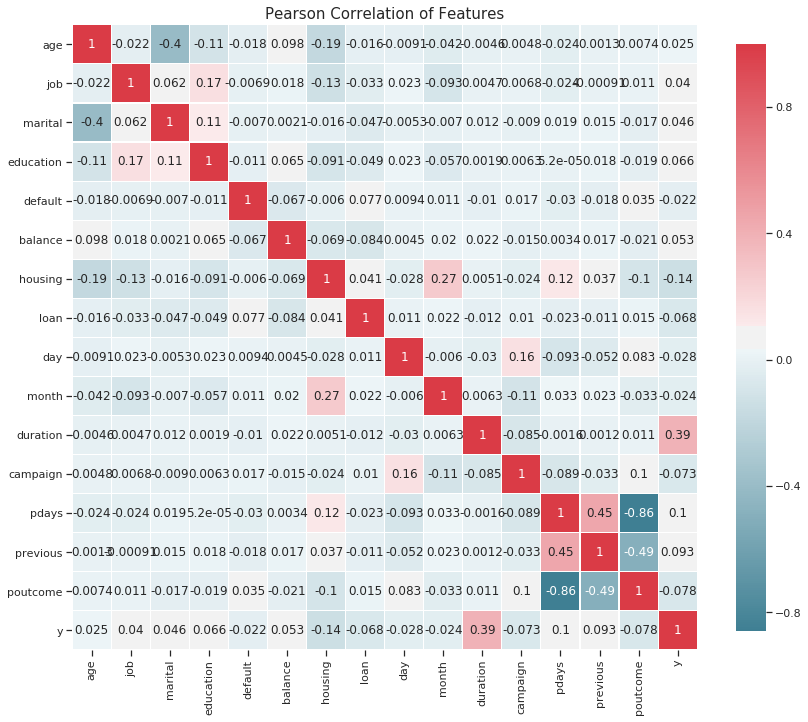

In [95]:
columns = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']
fn.correlation_heatmap(bank_full_df[columns])
bank_full_df[columns].corr().apply(lambda x: x.sort_values(ascending=False).values)

## Conclusão

Durante as analises descobrimos que as profissões com mais tendência de realizar um empréstimo seriam primeiramente as 'blue-collar', em seguida 'technician' e depois as 'management'; também descobrimos que os contatos feitos via telefone obtiveram melhores resultados e vimos também que a realização dos contatos durante a campanha surtiu um efeito positivo.

Como havíamos identificado anteriomente, se mostrou novamente como sendo uma linha verdadeira de analise. Durante a analise de fator determinante para que o banco efetue a exigência de um seguro de crédito, observamos que a profissão foi um dos fatos primordiais, juntamente com idade dos clientes, emprego atual, balanço médio anual, crédito habitacional ativo e empréstimo pessoal aprovados.
A tendência tem-se repetido no decorrer das análises, no qual foi feito uma analise para as características mais proeminentes de um cliente que possuí empréstimo imobiliário, vimos que a profissão também surgiu como sendo um dos fatores, juntamente com idade dos cleintes, grau de escolaridade e também entre clientes que assinaram um depósito a prazo.

Com isso concluímos que a profissão e idade podem ser variáveis proeminentes para diversas analises que possa ser feito futuramente.